<a href="https://colab.research.google.com/github/Debtanu-Ghosh/Categorical-Data-Descriptive-Statistics-in-R/blob/main/Using_R_to_describe_categorical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing packages
install.packages("ggplot2")
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#loading library
library("ggplot2")
library("gridExtra")

In [ ]:
# Create data
set.seed(10)
gender = sample(c('Female', 'Male'), 380, replace = TRUE)
smoking = sample(c('Past smoker', 'Current smoker', 'Non-smoker'), 380, replace = TRUE)
smoker_data = data.frame(gender = as.factor(gender), smoking = as.factor(smoking))
# you can also use view function for take a glance on whole data: View(smoker_data)
head(smoker_data,10)

,gender,smoking
,<fct>,<fct>
1,Female,Past smoker
2,Female,Current smoker
3,Male,Past smoker
4,Male,Non-smoker
5,Male,Current smoker
6,Female,Current smoker
7,Male,Past smoker
8,Male,Non-smoker
9,Female,Current smoker


In [ ]:
#frequency table
table1 = table(smoker_data$gender)
table2 = table(smoker_data$smoking)
print(table1)
print(table2)


Female   Male 
   191    189 

Current smoker     Non-smoker    Past smoker 
           112            128            140 


In [ ]:
#proportional table
prop.table(table1)
prop.table(table2)


   Female      Male 
0.5026316 0.4973684 


Current smoker     Non-smoker    Past smoker 
     0.2947368      0.3368421      0.3684211 

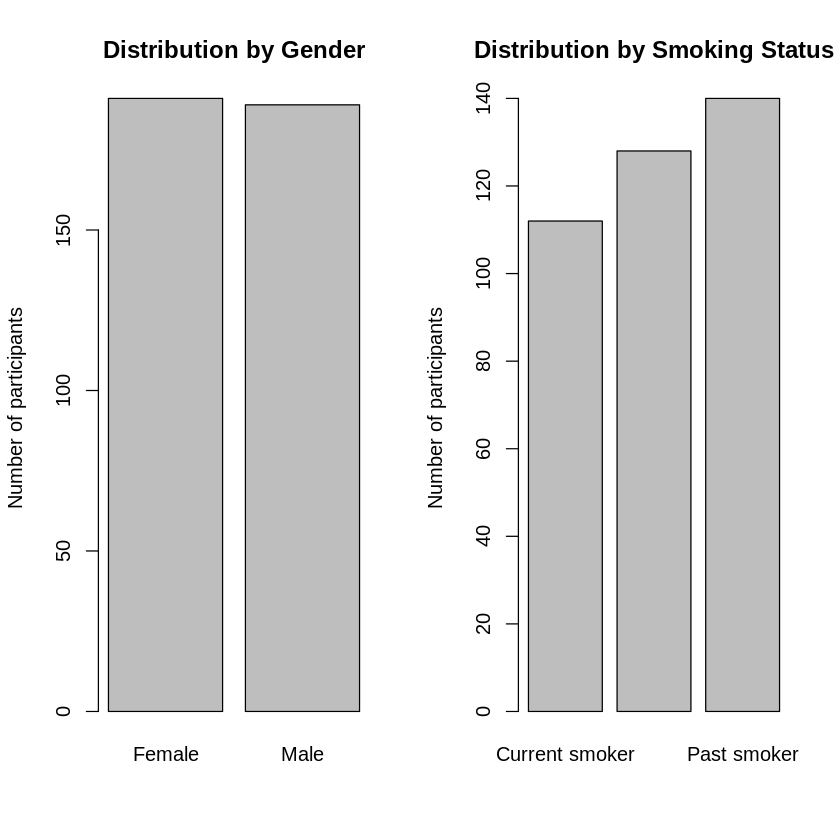

In [ ]:
# Bar plots vertical
par(mfrow=c(1,2))
barplot(table(smoker_data$gender), ylab = 'Number of participants', main = 'Distribution by Gender' )
barplot(table(smoker_data$smoking), ylab = 'Number of participants', main = 'Distribution by Smoking Status')

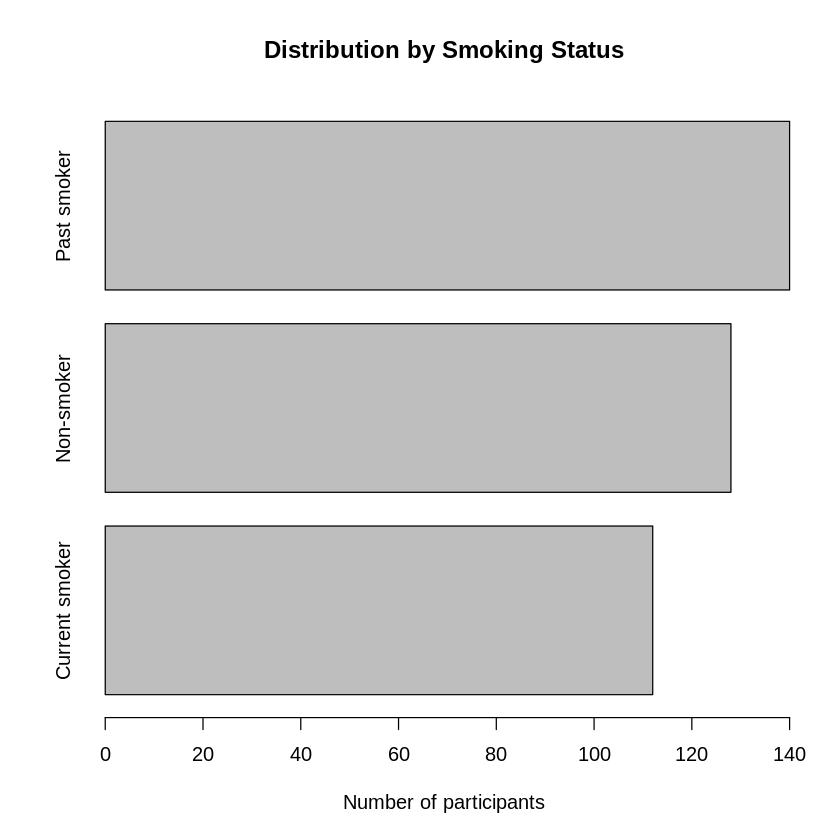

In [ ]:
#horizontal
par(mfrow=c(1,1))

barplot(table(smoker_data$smoking), horiz=TRUE, xlab = 'Number of participants', main = 'Distribution by Smoking Status')

In [ ]:
# Create a data frame for gender
gender_data <- as.data.frame(table(smoker_data$gender))
colnames(gender_data) <- c("gender", "count")
# Create a data frame for smoking
smoking_data <- as.data.frame(table(smoker_data$smoking))
colnames(smoking_data) <- c("smoking", "count")

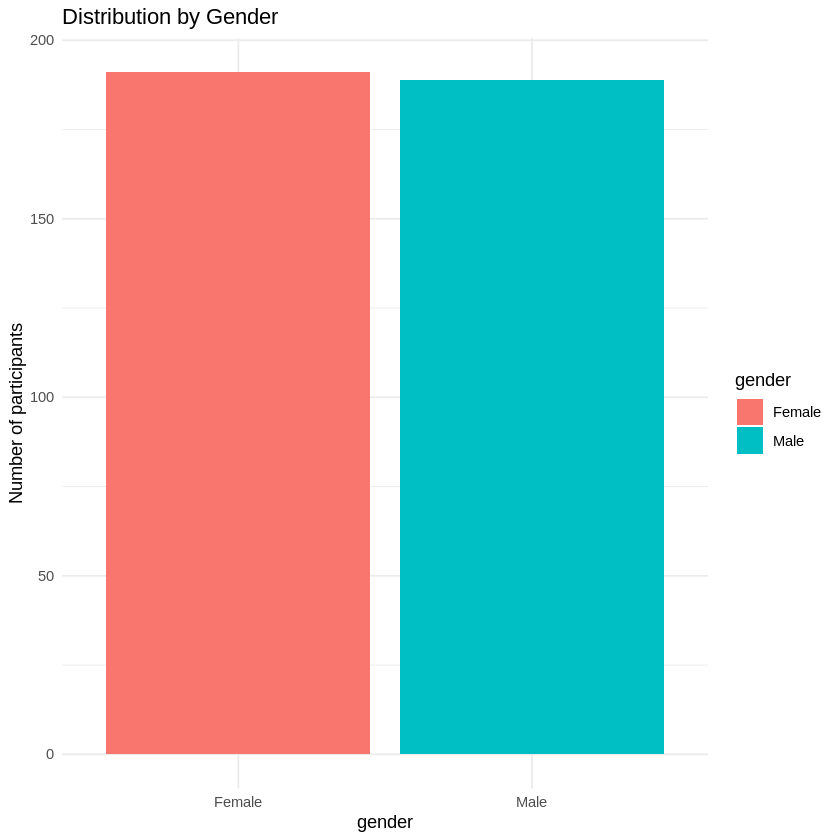

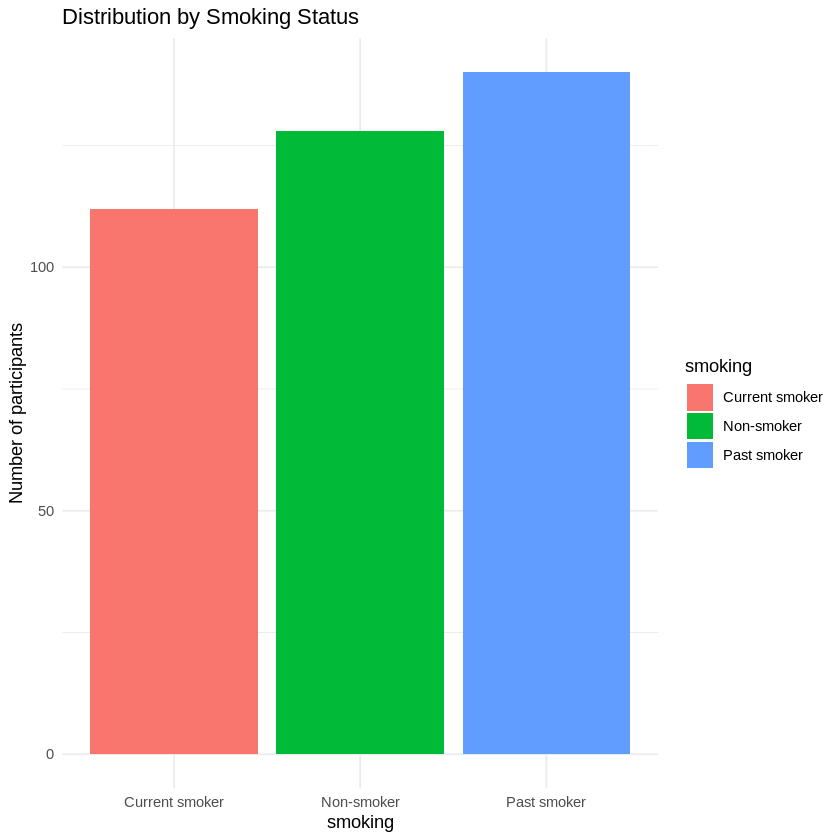

In [ ]:
# Create the bar plots
p1 <- ggplot(gender_data, aes(x = gender, y = count, fill = gender)) +
  geom_bar(stat = "identity") +
  labs(y = "Number of participants", title = "Distribution by Gender") +
  theme_minimal()
p2 <- ggplot(smoking_data, aes(x = smoking, y = count, fill = smoking)) +
  geom_bar(stat = "identity") +
  labs(y = "Number of participants", title = "Distribution by Smoking Status") +
  theme_minimal()
print(p1)
print(p2)

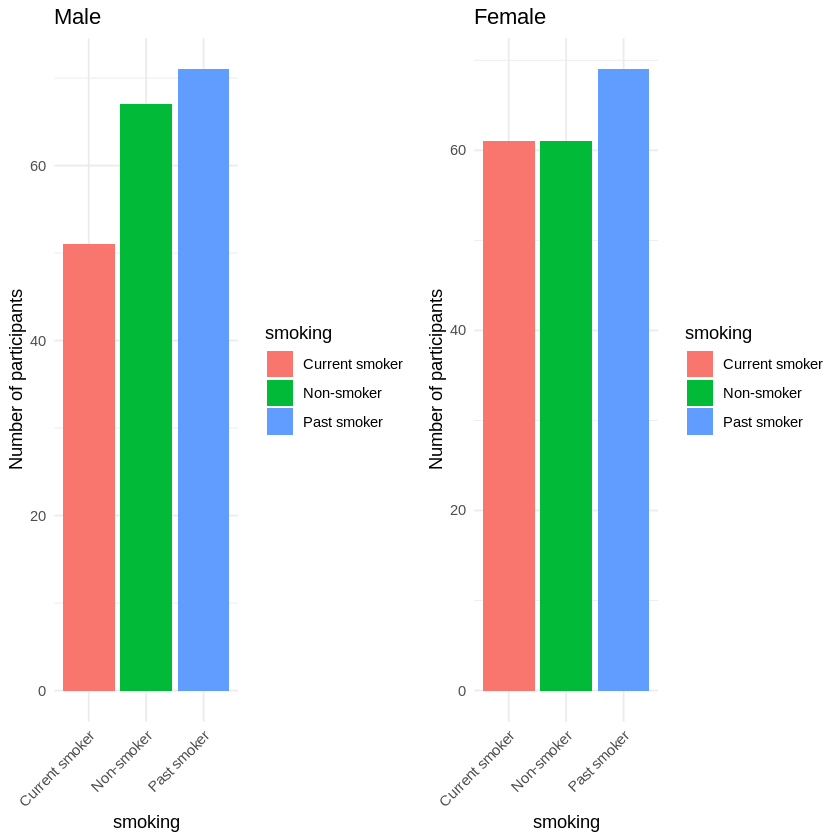

In [ ]:
# Create a data frame for each gender
male_data <- smoker_data[smoker_data$gender == "Male", ]
female_data <- smoker_data[smoker_data$gender == "Female", ]
# Create a data frame for smoking status
male_smoking_data <- as.data.frame(table(male_data$smoking))
colnames(male_smoking_data) <- c("smoking", "count")

female_smoking_data <- as.data.frame(table(female_data$smoking))
colnames(female_smoking_data) <- c("smoking", "count")
# Create the bar plots
p1 <- ggplot(male_smoking_data, aes(x = smoking, y = count, fill = smoking)) +
  geom_bar(stat = "identity") +
  labs(title = "Male", y = "Number of participants") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


p2 <- ggplot(female_smoking_data, aes(x = smoking, y = count, fill = smoking)) +
  geom_bar(stat = "identity") +
  labs(title = "Female", y = "Number of participants") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
# Arrange the plots side by side
grid.arrange(p1, p2, ncol = 2)

In [ ]:
#contingency table
table(smoker_data$gender,smoker_data$smoking)

        
         Current smoker Non-smoker Past smoker
  Female             61         61          69
  Male               51         67          71

In [ ]:
#marginal
smoking_table <- table(smoker_data$gender, smoker_data$smoking)
# Create a marginal table
marginal_table <- addmargins(smoking_table)
# Print the marginal table
print(marginal_table)

        
         Current smoker Non-smoker Past smoker Sum
  Female             61         61          69 191
  Male               51         67          71 189
  Sum               112        128         140 380


In [ ]:
# Compute the row percentages
row_percentages <- prop.table(smoking_table, 1) * 100
# Compute the column percentages
col_percentages <- prop.table(smoking_table, 2) * 100
print(row_percentages)
print(col_percentages)

        
         Current smoker Non-smoker Past smoker
  Female       31.93717   31.93717    36.12565
  Male         26.98413   35.44974    37.56614
        
         Current smoker Non-smoker Past smoker
  Female       54.46429   47.65625    49.28571
  Male         45.53571   52.34375    50.71429


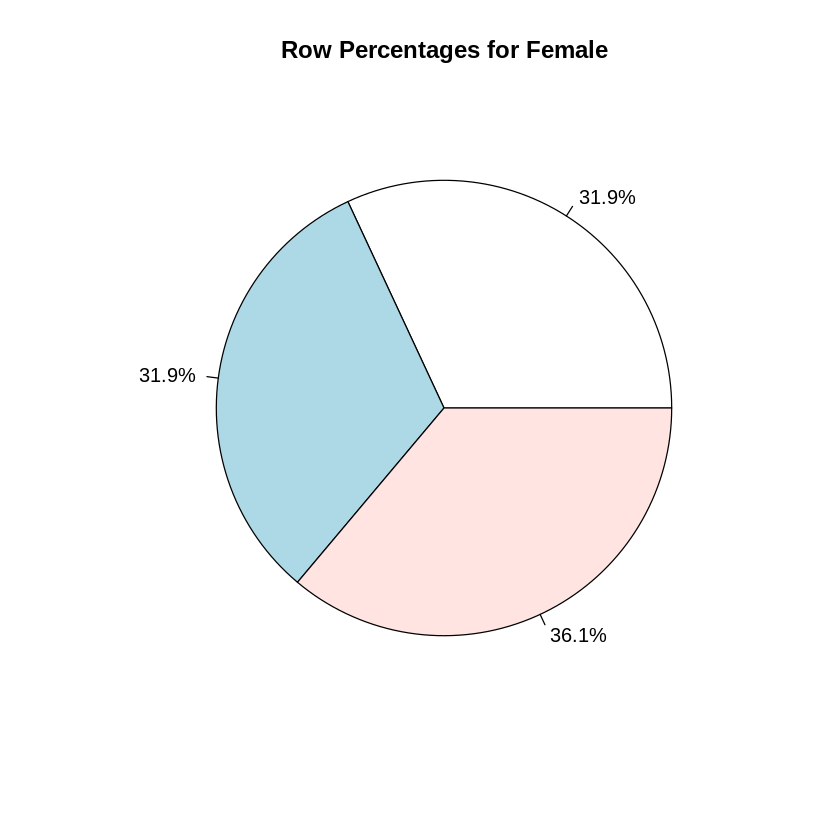

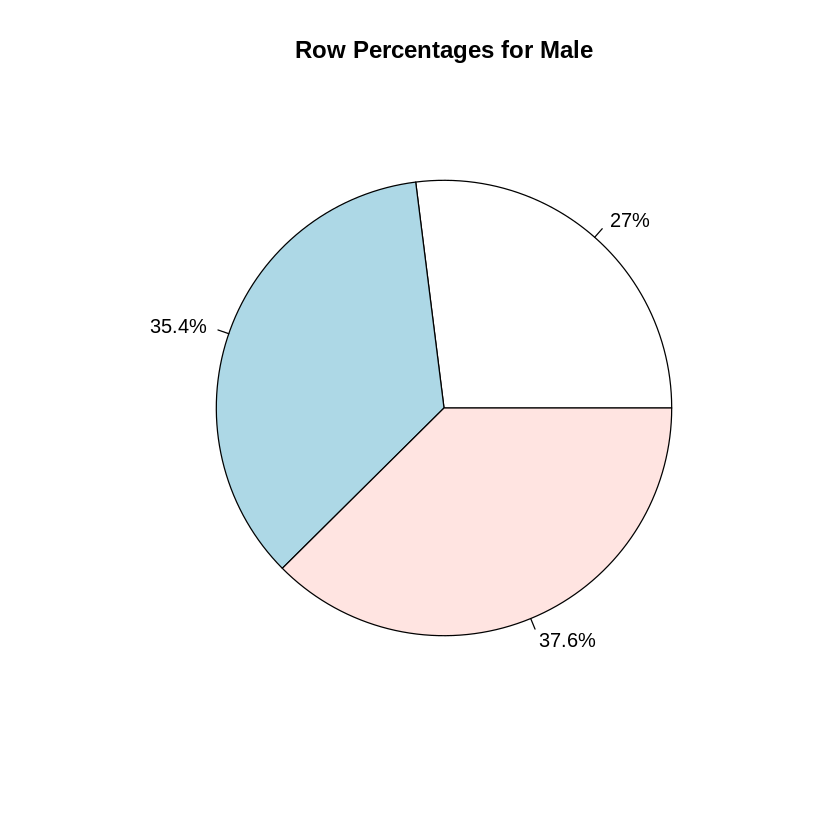

In [ ]:
genders <- unique(smoker_data$gender)
# For each gender, create a pie chart
for (gender in genders) {
  # Extract the row percentages for this gender
  gender_row_percentages <- row_percentages[gender, ]

  # Create the pie chart
  pie(gender_row_percentages, labels = paste0(round(gender_row_percentages, 1), "%"), main = paste("Row Percentages for", gender))
}

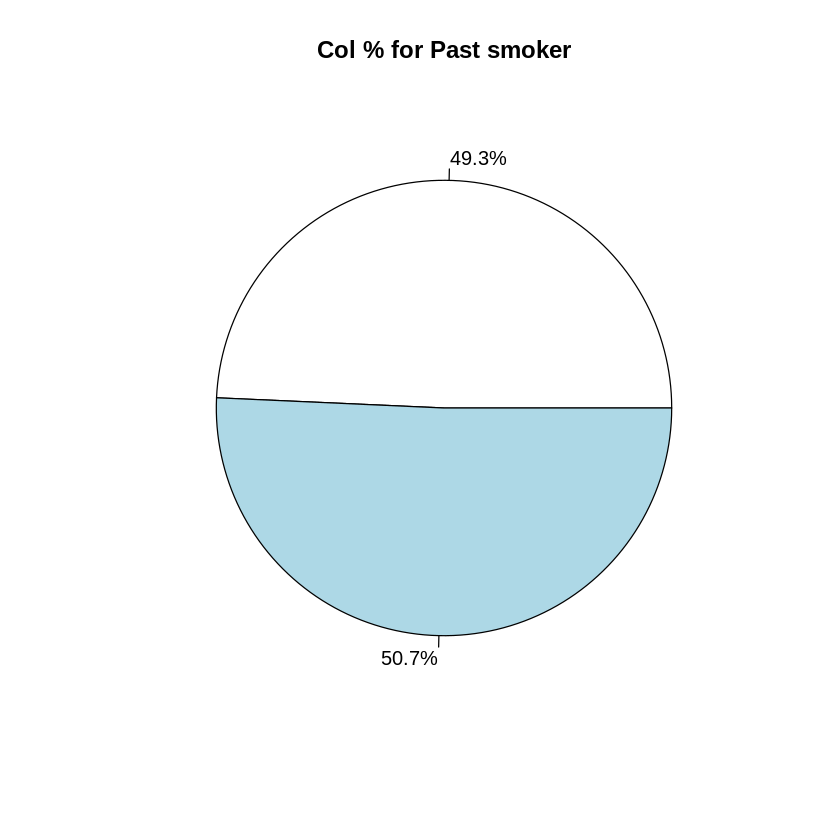

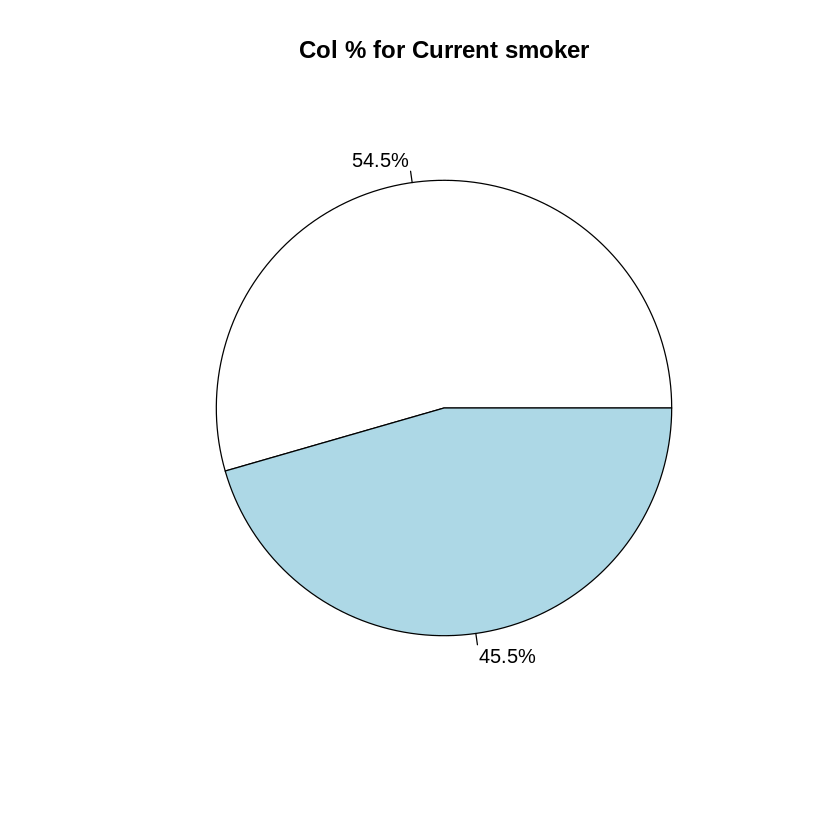

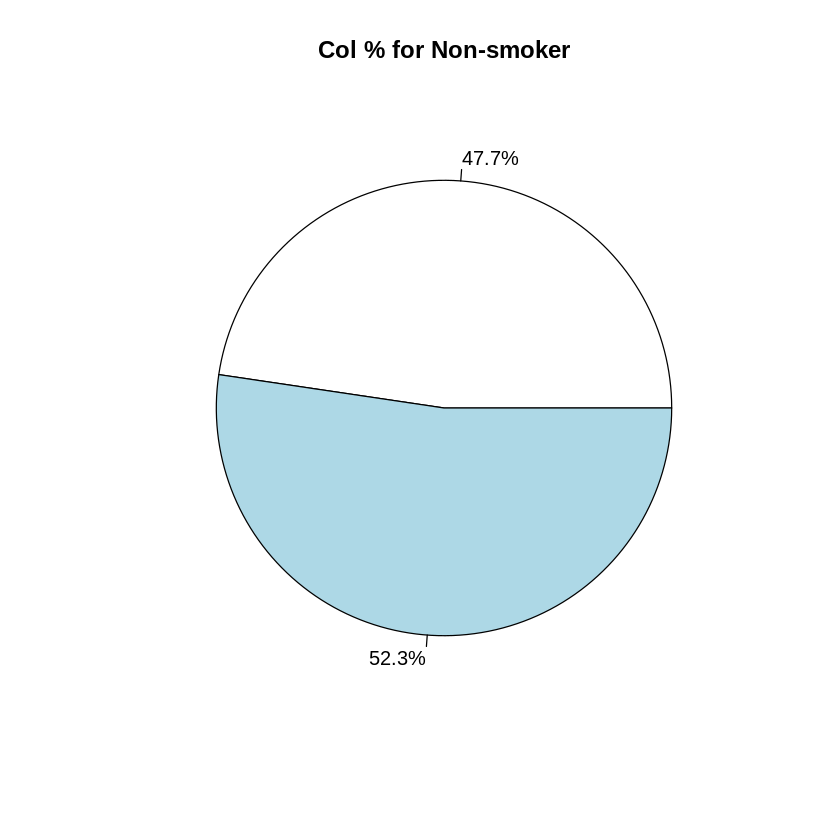

In [ ]:
# Extract the unique smoking statuses
statuses <- unique(smoker_data$smoking)
# For each smoking status, create a pie chart
for (status in statuses) {
     # Extract the column percentages for this status
     status_col_percentages <- col_percentages[, status]
     # Create the pie chart
     pie(status_col_percentages, labels = paste0(round(status_col_percentages, 1), "%"), main = paste("Col % for", status))
 }

In [ ]:
df = read.csv("Details.csv")
head(df)

,Order.ID,Amount,Profit,Quantity,Category,Sub.Category,PaymentMode
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,B-25681,1096,658,7,Electronics,Electronic Games,COD
2,B-26055,5729,64,14,Furniture,Chairs,EMI
3,B-25955,2927,146,8,Furniture,Bookcases,EMI
4,B-26093,2847,712,8,Electronics,Printers,Credit Card
5,B-25602,2617,1151,4,Electronics,Phones,Credit Card
6,B-25881,2244,247,4,Clothing,Trousers,Credit Card


In [ ]:
table1 = table(df$Category)
table2 = table(df$Sub.Category)
table3 = table(df$PaymentMode)

In [ ]:
print(table1)


   Clothing Electronics   Furniture 
        949         308         243 


In [ ]:
print(table2)


     Accessories        Bookcases           Chairs Electronic Games 
              72               79               74               79 
     Furnishings      Hankerchief            Kurti         Leggings 
              73              197               47               53 
          Phones         Printers            Saree            Shirt 
              83               74              211               69 
           Skirt            Stole          T-shirt           Tables 
              64              192               77               17 
        Trousers 
              39 


In [ ]:
print(table3)


        COD Credit Card  Debit Card         EMI         UPI 
        684         163         202         120         331 


In [ ]:
print(prop.table(table1))
print(prop.table(table2))
print(prop.table(table3))


   Clothing Electronics   Furniture 
  0.6326667   0.2053333   0.1620000 

     Accessories        Bookcases           Chairs Electronic Games 
      0.04800000       0.05266667       0.04933333       0.05266667 
     Furnishings      Hankerchief            Kurti         Leggings 
      0.04866667       0.13133333       0.03133333       0.03533333 
          Phones         Printers            Saree            Shirt 
      0.05533333       0.04933333       0.14066667       0.04600000 
           Skirt            Stole          T-shirt           Tables 
      0.04266667       0.12800000       0.05133333       0.01133333 
        Trousers 
      0.02600000 

        COD Credit Card  Debit Card         EMI         UPI 
  0.4560000   0.1086667   0.1346667   0.0800000   0.2206667 


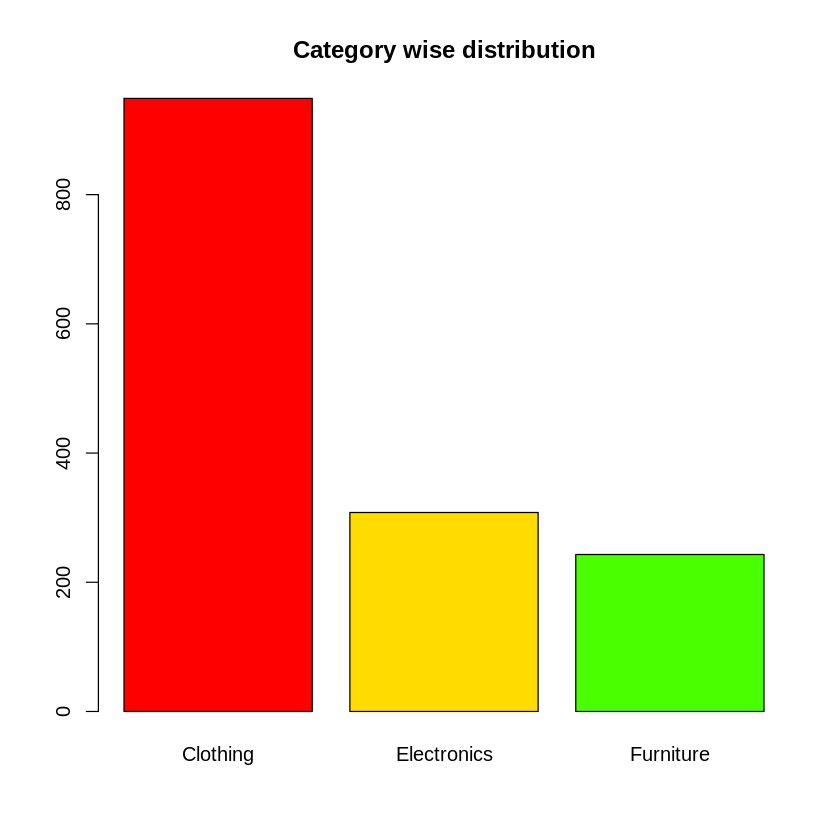

In [ ]:
# create color vector using rainbow() function
color <- rainbow(7)

barplot(table(df$Category), main = "Category wise distribution",col = color)

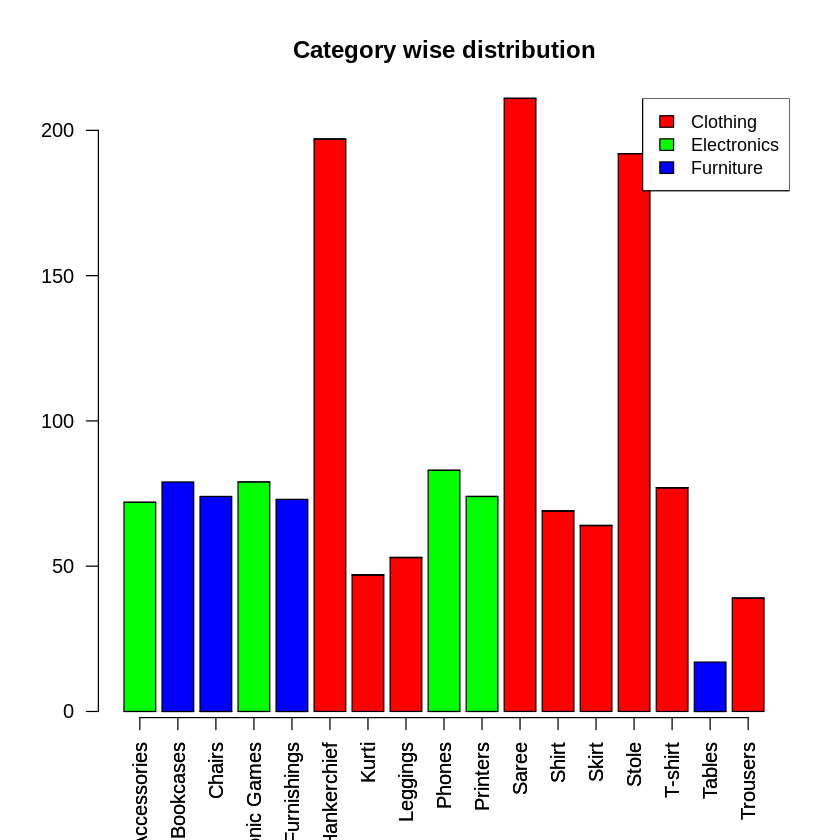

In [ ]:
table4 <- table(df$Category, df$Sub.Category)

# Create a color vector
color <- rainbow(nrow(table4))

# Set the rotation for x-axis labels to 45 degrees
par(las=2)

# Create the vertically stacked bar plot
bp <- barplot(table4, main = "Category wise distribution", col = color)

# Add the legend
legend("topright", legend = rownames(table4),cex = 0.9, fill = color)

# Add x-axis labels with a 45 degree angle
axis(1, at=bp, labels=colnames(table4), las=2, cex.axis=1)

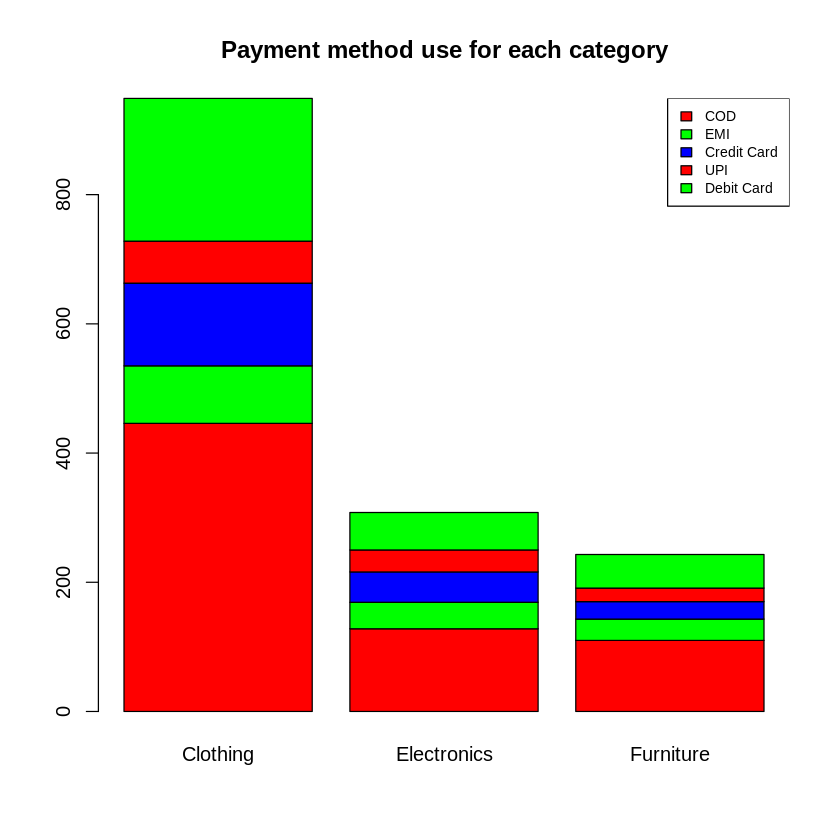

In [ ]:
barplot(table(df$PaymentMode, df$Category), main = "Payment method use for each category", col = color)
legend("topright", unique(df$PaymentMode), cex = 0.7 , fill = color)

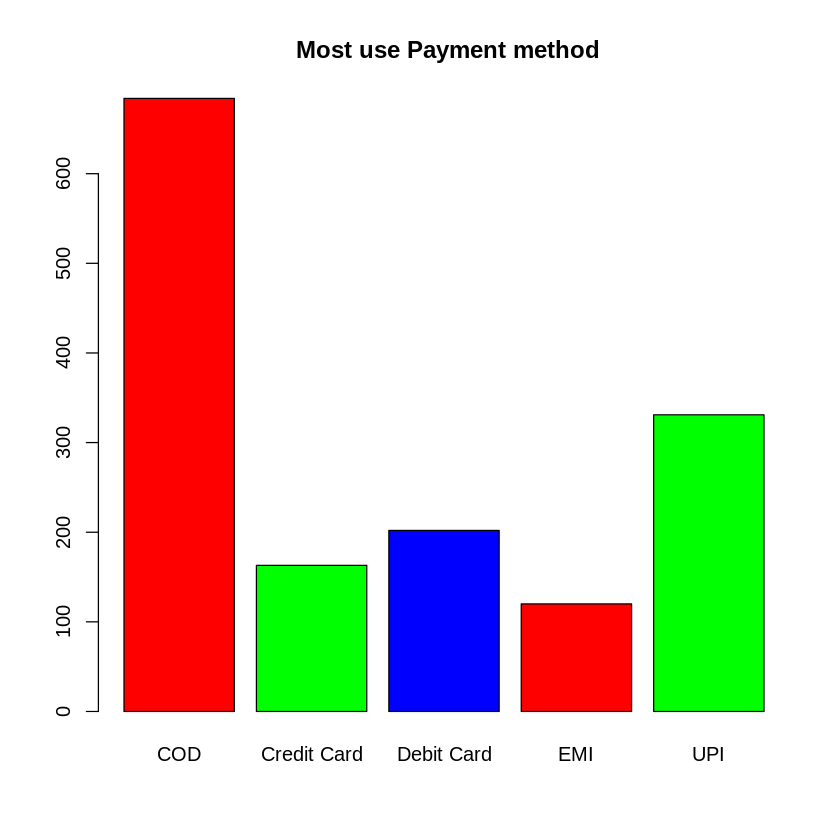

In [ ]:
barplot(table3,main = " Most use Payment method",col= color)

In [ ]:
table4 <- table(df$Category, df$Sub.Category)
print(table4)

             
              Accessories Bookcases Chairs Electronic Games Furnishings
  Clothing              0         0      0                0           0
  Electronics          72         0      0               79           0
  Furniture             0        79     74                0          73
             
              Hankerchief Kurti Leggings Phones Printers Saree Shirt Skirt
  Clothing            197    47       53      0        0   211    69    64
  Electronics           0     0        0     83       74     0     0     0
  Furniture             0     0        0      0        0     0     0     0
             
              Stole T-shirt Tables Trousers
  Clothing      192      77      0       39
  Electronics     0       0      0        0
  Furniture       0       0     17        0


In [ ]:
table5 <- table(df$PaymentMode,df$Sub.Category,df$Category)
table5

, ,  = Clothing

             
              Accessories Bookcases Chairs Electronic Games Furnishings
  COD                   0         0      0                0           0
  Credit Card           0         0      0                0           0
  Debit Card            0         0      0                0           0
  EMI                   0         0      0                0           0
  UPI                   0         0      0                0           0
             
              Hankerchief Kurti Leggings Phones Printers Saree Shirt Skirt
  COD                  95    30       26      0        0    95    31    31
  Credit Card          19     3        2      0        0    24     6     7
  Debit Card           28     4       12      0        0    32    11     6
  EMI                   7     2        1      0        0    20     5     2
  UPI                  48     8       12      0        0    40    16    18
             
              Stole T-shirt Tables Trousers
  COD          

THANK YOU